In [ ]:
import pandas as pd
import numpy   as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import zero_one_loss

sns.set_theme()
Dataset = pd.read_csv('wdbc_normalizacao.csv')
Dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Para Validação Dividimos os Dados:**
- **treino**,75%
- **teste**, 25%

In [ ]:
from sklearn.model_selection import train_test_split

# Dividindo em treino e teste 85% treino e 15% teste:
D_treino, D_teste = train_test_split(Dataset, test_size=.15, random_state=30) #test_size, por padrão é 25%

print("D_treino: ", D_treino.shape, dict(D_treino.iloc[:, 0].value_counts()))
print("D_teste: ", D_teste.shape, dict(D_teste.iloc[:, 0].value_counts()))

D_treino:  (483, 31) {0: 305, 1: 178}
D_teste:  (86, 31) {0: 52, 1: 34}


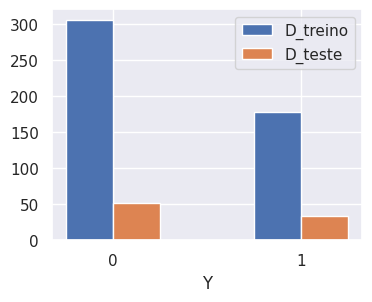

In [ ]:
# visualizar as amostras:
plt.figure(figsize=(4,3))
plt.hist([D_treino.iloc[:, 0], D_teste.iloc[:, 0]], bins=[0,1,2], align='left', rwidth=0.5)
plt.legend(['D_treino','D_teste'])
plt.xlabel('Y'), plt.xticks([0,1])
plt.show()

In [ ]:
# Selecionado os atributos e classes de treino e teste.
X_treino = D_treino.iloc[:, 1:31]
Y_treino = D_treino.iloc[:, 0]
print("D_treino: ", (X_treino.shape, Y_treino.shape))

X_teste = D_teste.iloc[:, 1:31]
Y_teste = D_teste.iloc[:, 0]
print("D_teste: ", (X_teste.shape, Y_teste.shape))


D_treino:  ((483, 30), (483,))
D_teste:  ((86, 30), (86,))


**Normalização:**

In [ ]:
def Normalization(x):
    return x/x.abs().max()

In [ ]:
X_treino_Normalizado = Normalization(X_treino)
X_teste_Normalizado = Normalization(X_teste)

In [ ]:
# Dividindo em  dados de treino e validação 15%
X_train, X_val, y_train, y_val = train_test_split(X_treino_Normalizado, Y_treino, test_size=0.15, random_state=30)

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((410, 30), (73, 30), (410,), (73,))

In [ ]:
def teste(g, D_tst, metrica, **kwds):
    X_tst, y_tst = D_tst
    y_true = y_tst
    y_pred = g.predict(X_tst)
    E_tst = metrica(y_true, y_pred, **kwds)

    return E_tst


def validacao2(Modelo, D_trn, D_val, metrica, **kwds):
    # Treinamento:
    # g = Modelo.fit(*D_trn)

    # Teste:
    E_trn = teste(Modelo, D_trn, metrica, **kwds)
    E_val = teste(Modelo, D_val, metrica, **kwds)

    return E_trn, E_val

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

## Performando o GridSearch

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}
clf2 = GridSearchCV(MLPClassifier(max_iter=1000), param_grid, n_jobs=-1)

clf2.fit(X_train, y_train)
print(clf2.score(X_train, y_train))
print(clf2.best_params_)

In [ ]:
modelo2 = clf2.best_estimator_

In [ ]:
#Avaliando o modelo pós grid-search:
E_trn, E_tst = validacao2(modelo2, (X_train, y_train), (X_teste_Normalizado, Y_teste), zero_one_loss)
print("Erro de treinamento:", E_trn)
print("Erro de teste :", E_tst)

Erro de treinamento: 0.029268292682926855
Erro de teste : 0.09302325581395354


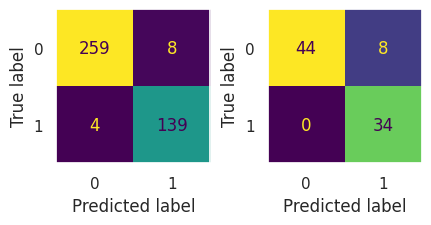

In [ ]:
# Plot matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Avaliação modelo  (matriz de confusão)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm_trn, cm_tst = validacao2(modelo2, (X_train, y_train), (X_teste_Normalizado, Y_teste), confusion_matrix)

with sns.plotting_context(rc={'grid.linewidth': 0}):
    fig, ax = plt.subplots(ncols=2, figsize=(5,2))
    ConfusionMatrixDisplay(confusion_matrix=cm_trn, display_labels=[0,1]).plot(ax=ax[0], colorbar=False)
    ConfusionMatrixDisplay(confusion_matrix=cm_tst, display_labels=[0,1]).plot(ax=ax[1], colorbar=False)

In [ ]:
# Avaliação modelo  (relatório de classificação)

from sklearn.metrics import classification_report

cr_trn, cr_tst = validacao2(modelo, (X_train, y_train), (X_teste_Normalizado, Y_teste),
                            classification_report, target_names=['Outcome 0', 'Outcome 1'])
print("treino:\n", cr_trn)
print("teste :\n", cr_tst)

treino:
               precision    recall  f1-score   support

   Outcome 0       0.99      0.99      0.99       267
   Outcome 1       0.99      0.98      0.98       143

    accuracy                           0.99       410
   macro avg       0.99      0.99      0.99       410
weighted avg       0.99      0.99      0.99       410

teste :
               precision    recall  f1-score   support

   Outcome 0       1.00      0.52      0.68        52
   Outcome 1       0.58      1.00      0.73        34

    accuracy                           0.71        86
   macro avg       0.79      0.76      0.71        86
weighted avg       0.83      0.71      0.70        86

